<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.956699,60.441095,0.010080,115.407874,115.388561,0.019313
1,0.0,1.0,73.663672,71.347389,0.065124,155.076184,155.017200,0.058985
2,0.0,2.0,78.686524,89.308042,-0.018410,177.976156,178.008245,-0.032089
3,0.0,3.0,88.729432,98.450842,0.005070,197.185343,197.200940,-0.015597
4,0.0,4.0,71.939171,96.878771,0.051403,178.869345,178.831070,0.038275
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.864490,20.619381,0.115535,120.599406,120.531982,0.067424
19996,999.0,16.0,88.164383,99.525606,0.037223,197.727212,197.686101,0.041111
19997,999.0,17.0,81.152633,53.413632,-0.016757,144.549508,144.591549,-0.042040
19998,999.0,18.0,92.880513,55.105625,0.005047,157.991184,158.012094,-0.020910


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.956699,60.441095,0.010080,115.407874,115.388561,0.019313
1,0.0,1.0,73.663672,71.347389,0.065124,155.076184,155.017200,0.058985
2,0.0,2.0,78.686524,89.308042,-0.018410,177.976156,178.008245,-0.032089
3,0.0,3.0,88.729432,98.450842,0.005070,197.185343,197.200940,-0.015597
4,0.0,4.0,71.939171,96.878771,0.051403,178.869345,178.831070,0.038275
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.864490,20.619381,0.115535,120.599406,120.531982,0.067424
19996,999.0,16.0,88.164383,99.525606,0.037223,197.727212,197.686101,0.041111
19997,999.0,17.0,81.152633,53.413632,-0.016757,144.549508,144.591549,-0.042040
19998,999.0,18.0,92.880513,55.105625,0.005047,157.991184,158.012094,-0.020910


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.956699  60.441095  0.010080  115.407874  115.388561  0.019313
      1.0    73.663672  71.347389  0.065124  155.076184  155.017200  0.058985
      2.0    78.686524  89.308042 -0.018410  177.976156  178.008245 -0.032089
      3.0    88.729432  98.450842  0.005070  197.185343  197.200940 -0.015597
      4.0    71.939171  96.878771  0.051403  178.869345  178.831070  0.038275
...                ...        ...       ...         ...         ...       ...
999.0 15.0   89.864490  20.619381  0.115535  120.599406  120.531982  0.067424
      16.0   88.164383  99.525606  0.037223  197.727212  197.686101  0.041111
      17.0   81.152633  53.413632 -0.016757  144.549508  144.591549 -0.042040
      18.0   92.880513  55.105625  0.005047  157.991184  158.012094 -0.020910
      19.0   31.186927  53.274322  0.054893   94.516142   94.479029  0.037114

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.956699  60.441095  0.010080  115.407874  115.388561  0.019313
      1.0    73.663672  71.347389  0.065124  155.076184  155.017200  0.058985
      2.0    78.686524  89.308042 -0.018410  177.976156  178.008245 -0.032089
      3.0    88.729432  98.450842  0.005070  197.185343  197.200940 -0.015597
      4.0    71.939171  96.878771  0.051403  178.869345  178.831070  0.038275
...                ...        ...       ...         ...         ...       ...
999.0 15.0   89.864490  20.619381  0.115535  120.599406  120.531982  0.067424
      16.0   88.164383  99.525606  0.037223  197.727212  197.686101  0.041111
      17.0   81.152633  53.413632 -0.016757  144.549508  144.591549 -0.042040
      18.0   92.880513  55.105625  0.005047  157.991184  158.012094 -0.020910
      19.0   31.186927  53.274322  0.054893   94.516142   94.479029  0.037114

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.956699,60.441095,0.010080,115.407874,115.388561,0.019313
1,0.0,1.0,73.663672,71.347389,0.065124,155.076184,155.017200,0.058985
2,0.0,2.0,78.686524,89.308042,-0.018410,177.976156,178.008245,-0.032089
3,0.0,3.0,88.729432,98.450842,0.005070,197.185343,197.200940,-0.015597
4,0.0,4.0,71.939171,96.878771,0.051403,178.869345,178.831070,0.038275
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,89.864490,20.619381,0.115535,120.599406,120.531982,0.067424
19996,999.0,16.0,88.164383,99.525606,0.037223,197.727212,197.686101,0.041111
19997,999.0,17.0,81.152633,53.413632,-0.016757,144.549508,144.591549,-0.042040
19998,999.0,18.0,92.880513,55.105625,0.005047,157.991184,158.012094,-0.020910


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.956699  60.441095  0.010080  115.407874  115.388561  0.019313
      1.0    73.663672  71.347389  0.065124  155.076184  155.017200  0.058985
      2.0    78.686524  89.308042 -0.018410  177.976156  178.008245 -0.032089
      3.0    88.729432  98.450842  0.005070  197.185343  197.200940 -0.015597
      4.0    71.939171  96.878771  0.051403  178.869345  178.831070  0.038275
...                ...        ...       ...         ...         ...       ...
999.0 15.0   89.864490  20.619381  0.115535  120.599406  120.531982  0.067424
      16.0   88.164383  99.525606  0.037223  197.727212  197.686101  0.041111
      17.0   81.152633  53.413632 -0.016757  144.549508  144.591549 -0.042040
      18.0   92.880513  55.105625  0.005047  157.991184  158.012094 -0.020910
      19.0   31.186927  53.274322  0.054893   94.516142   94.479029  0.037114

[20000 rows x 6 columns]

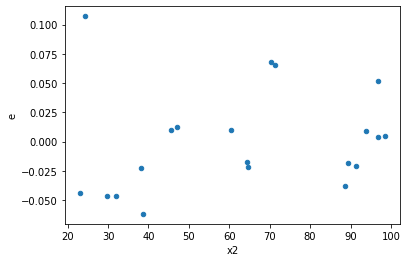

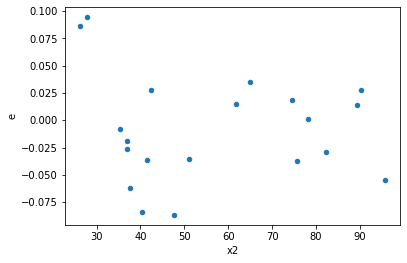

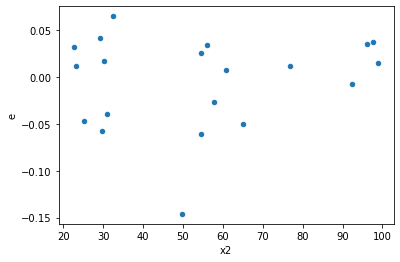

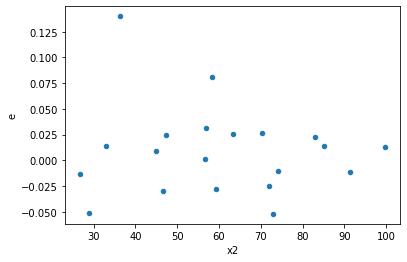

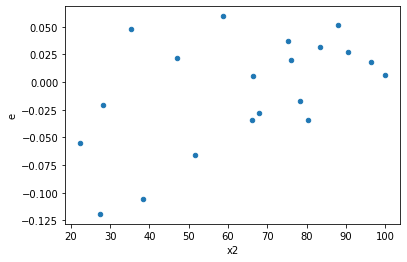

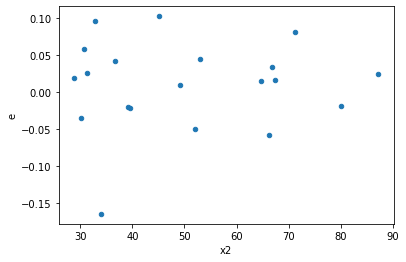

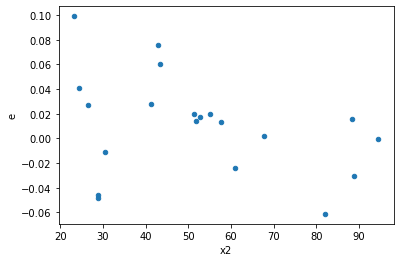

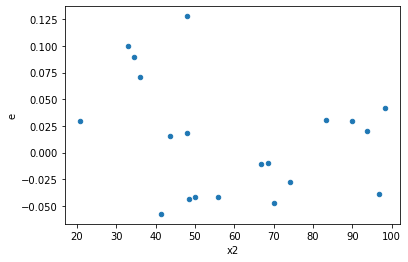

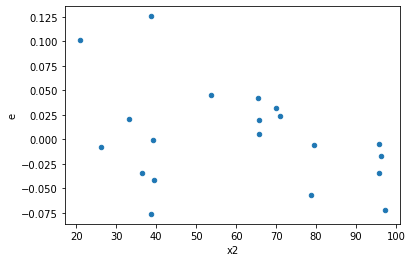

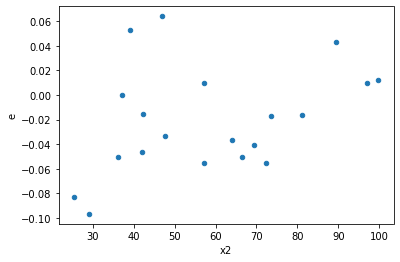

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,0.004921091029584603,0.007337111481094761,0.0008201818382641005,0.0012228519135157935,1.4909521967761887,0.6399072982534797,0.6800463508732602,0.31995364912673985,Reject001=1 : Homoscedasticity
9.0,6.0,6.0,0.00516008400322057,0.01170603131024258,0.0008600140005367617,0.0019510052183737633,2.2685737873523917,0.3420643400365184,0.8289678299817408,0.1710321700182592,Reject001=1 : Homoscedasticity
11.0,6.0,6.0,0.008881002550577026,0.010505859376323503,0.0014801670917628377,0.001750976562720584,1.182958716259,0.8435863743379688,0.5782068128310156,0.4217931871689844,Reject001=1 : Homoscedasticity
13.0,6.0,6.0,0.008773131721095192,0.009923222435256654,0.001462188620182532,0.001653870405876109,1.1310923796340642,0.8849515618276613,0.5575242190861693,0.44247578091383066,Reject001=1 : Homoscedasticity
15.0,6.0,6.0,0.004790206909105529,0.005228846226710379,0.0007983678181842547,0.0008714743711183966,1.0915700148089758,0.9180163663877994,0.5409918168061003,0.4590081831938997,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,0.004236944875538288,0.006159544580900747,0.0007061574792563813,0.0010265907634834578,1.453770290112212,0.6610845760411102,0.6694577119794449,0.3305422880205551,Reject001=1 : Homoscedasticity
22.0,6.0,6.0,0.005454668203770034,0.007231539228043366,0.0009091113672950057,0.0012052565380072276,1.325752357044418,0.7407959027187003,0.6296020486406498,0.37039795135935016,Reject001=1 : Homoscedasticity
23.0,6.0,6.0,0.0010751258536980425,0.0028189672401021477,0.00017918764228300708,0.00046982787335035793,2.6219881425099434,0.2658460144333741,0.867076992783313,0.13292300721668704,Reject001=1 : Homoscedasticity
33.0,6.0,6.0,0.009689499539692755,0.020020714058443898,0.0016149165899487924,0.003336785676407316,2.0662278765203115,0.3986534477710615,0.8006732761144693,0.19932672388553074,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.004921091029584603,0.007337111481094761,0.0008201818382641005,0.0012228519135157935,1.4909521967761887,0.6399072982534797,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.019416558861264786,0.005189816297150302,0.003236093143544131,0.0008649693828583836,0.26728816028795743,0.1332899365276352,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.008743689097280365,0.0028392254706965064,0.0014572815162133942,0.0004732042451160844,0.32471711186295704,0.19687554262678872,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.006979772982453527,0.006317552057641269,0.001163295497075588,0.0010529253429402115,0.9051228562193903,0.9067772839894757,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.015632666981353543,0.0057637013434082675,0.002605444496892257,0.0009606168905680446,0.3686959717291452,0.24999763247097123,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,0.029649978815138575,0.009612438501606127,0.004941663135856429,0.0016020730836010212,0.3241971456889623,0.19626710860702218,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.011251679586789425,0.004979392527528803,0.0018752799311315708,0.0008298987545881338,0.44254659840963634,0.3443339648670347,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.02947436681846039,0.007411944573774648,0.004912394469743398,0.001235324095629108,0.2514708668527664,0.11728931442204603,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.01288275022786356,0.004633965785210836,0.00214712503797726,0.0007723276308684726,0.35970314593138863,0.23889455846124505,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      912
Reject001=0 : Heteroscedasticity     88
Name: Result_test, dtype: int64